In [ ]:
from huggingface_hub import login
from google.colab import userdata
from transformers import AutoTokenizer

In [ ]:
HF_token = userdata.get("HF_TOKEN")
login( HF_token, add_to_git_credential = True)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('meta-llama/Meta-Llama-3.3-8B', trust_remote_code=True)

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3.1-8B.
403 Client Error. (Request ID: Root=1-676e3116-27ada3d15fb2b8ff294eba79;285c3981-9ab6-4768-8aec-15caf346dc14)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3.1-8B/resolve/main/config.json.
Your request to access model meta-llama/Llama-3.1-8B has been rejected by the repo's authors.

In [ ]:
PHI3_MODEL_NAME = "microsoft/Phi-3-mini-4k-instruct"
QWEN2_MODEL_NAME = "Qwen/Qwen2-7B-Instruct"
STARCODER2_MODEL_NAME = "bigcode/starcoder2-3b"

In [ ]:
text ="I am excited to show Tokenizers in action to my LLM engineers"
messages = [
    {"role": "system", "content": "You are a helpful assistant"},
    {"role": "user", "content": "Tell a light-hearted joke for a room of Data Scientists"}
  ]

In [ ]:
pi_tokeniser = AutoTokenizer.from_pretrained (PHI3_MODEL_NAME)
print(pi_tokeniser.encode (text))

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

[306, 626, 24173, 304, 1510, 25159, 19427, 297, 3158, 304, 590, 365, 26369, 6012, 414]


In [ ]:
pi_tokeniser.apply_chat_template(messages,tokenize=False, add_genertion_promplt=True )

'<|system|>\nYou are a helpful assistant<|end|>\n<|user|>\nTell a light-hearted joke for a room of Data Scientists<|end|>\n<|endoftext|>'

# Source : Hands on Large Language Models (https://learning.oreilly.com/library/view/hands-on-large-language/9781098150952/ch02.html#how_tokenizers_prepare_the_inputs_to_th)

## What are Tokens and Embeddings

Words -> Token -> Embeddings -> Models

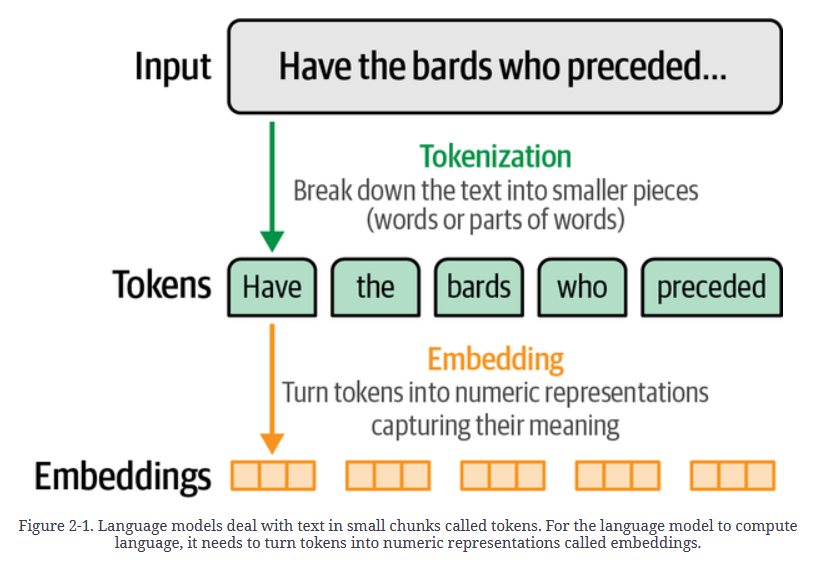

## LLM Tokenization


### Downloading and Running an LLM

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

#load model and Tokenizer

model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct", device_map="cuda", torch_dtype="auto", trust_remote_code= True)
tokeniser= AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

In [ ]:
text ="Write an email apologizing to Sarah for the tragic gardening mishap. Explain how it happened.<|assistant|>"

#Tokenize the input
input_ids = tokeniser(text, return_tensors="pt").input_ids.to("cuda")

#Generate Text

generation_output = model.generate(input_ids= input_ids, max_new_tokens=500)



In [ ]:
print(tokeniser.decode( generation_output[0]))

Write an email apologizing to Sarah for the tragic gardening mishap. Explain how it happened.<|assistant|> Subject: Sincere Apologies for the Gardening Mishap


Dear Sarah,


I hope this message finds you well. I am writing to express my deepest apologies for the unfortunate incident that occurred in your garden yesterday.


As you know, I have always admired the beauty and tranquility of your garden. It was with great disappointment that I witnessed the accidental damage caused to your beloved rose bushes. I understand how much effort and care you put into maintaining your garden, and it pains me to have caused any harm to it.


The mishap happened when I was attempting to prune the overgrown branches of the hedge. Unfortunately, in my haste, I misjudged the distance and accidentally struck the rose bushes with the shears. I realize now that I should have taken more time to assess the situation and proceed with greater caution.


Please know that I am fully committed to making amends 

In [ ]:
print(input_ids)

tensor([[14350,   385,  4876, 27746,  5281,   304, 19235,   363,   278, 25305,
           293, 16423,   292,   286,   728,   481, 29889, 12027,  7420,   920,
           372,  9559, 29889, 32001]], device='cuda:0')


In [ ]:
for id in input_ids[0]:
  print(tokeniser.decode(id))


Write
an
email
apolog
izing
to
Sarah
for
the
trag
ic
garden
ing
m
ish
ap
.
Exp
lain
how
it
happened
.
<|assistant|>


This is how the tokenizer broke down our input prompt. Notice the following:

    1. The first token is ID 1 (<s>), a special token indicating the beginning of
    2. Some tokens are parts of words (e.g., apolog, izing, trag, ic).
    3. Some tokens are complete words (e.g., Write, an, email).
    4. Punctuation characters are their own token.



Notice how the space character does not have its own token. Instead, partial tokens (like “izing” and “ic”) have a special hidden character at their beginning that indicates that they’re connected with the token that precedes them in the text. Tokens without that special character are assumed to have a space before them.

# How does the tokensier break down text
There are 3 major factors that dictate how the a tokeniser breaks down text

1.   **Model Design time**: which tokenization method is being used?
Poplular methods are:-

*   Byte Pair encoding (BPE) - used by GPT
*   WordPiece encoding (WPE) - used by BERT
Both the above methods are similar as they both try to optimise the efficient set of tokens to represent a text dataset, but they arrive at is differently.

2.   **Tokeniser Configurations**: Size of vocabulary, what special token to use

3. **Training DataSet**: which is the best vocabulary to represent the datset? same method and config if trained on english will work differently thean if trained oncode or multilingual dataset.

# Types of TOkenisers

**Word Tokeniser**:
What - Each word corresponds to 1 token.
Examples: used in Word2Vec.
Disadvantages:
1. More tokens are needed for similar words - apology, apologize, apologetic, apologist. - this can be resolved by using subword tokens
2. Cannot handled new words once the tokeniser has been trained.

**SubWord Tokeniser**:
What: full or partial Words
Example: GPT/RoBERTa
Advantage:
1. Vocabulary expressitivity.
2. new words can be broken down into smaller ones, which would probably be part of the vocabulary it was trained on.
3. advantage over character token is that it can fit more text within the limited context window of the transformer. 1 token ~ 3 characters
4. some tokens are also byte tokens as the final building block to fall on when they encounter characters they otherwise cannot represent. GPT2/RoBERTa do this.

**Character tokens**:
What:  each word is broken into characters
Example:  
Advantage:
1. Can sucessfully deal with all the new words as
Disadvantaqge: Model becomes more complex as it also has it also has to model the word p-l-a-y in addition to modelling the rest of the sequence.

2. new words can be broken down into smaller ones, which would probably be part of the vocabulary it was trained on.

**Bye Tokenization**
What:  break down individual tokens into bytes that are used to represent the unicode characters

Example:  
Advantage:

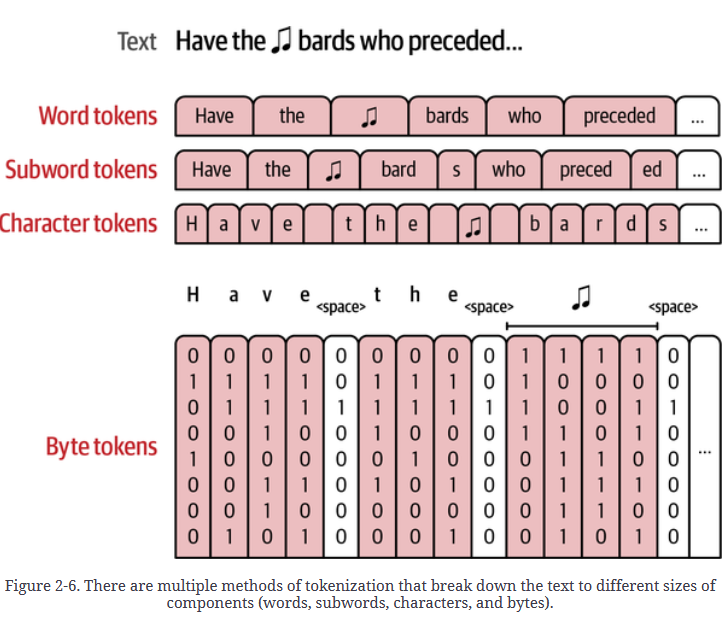

# Comparing LLM Tokenisers

Compare different models to see how they deal with
1. Capitalisation
2. Language other than English
2. EMojis
4. Programming Code with keywords and whitespaces often used for indentations (Python )
5. Numbers and digits
6. Special Tokens : these are unique tokens that have role other than representing text - represent start and end of text (to tell the model the generation is completed)

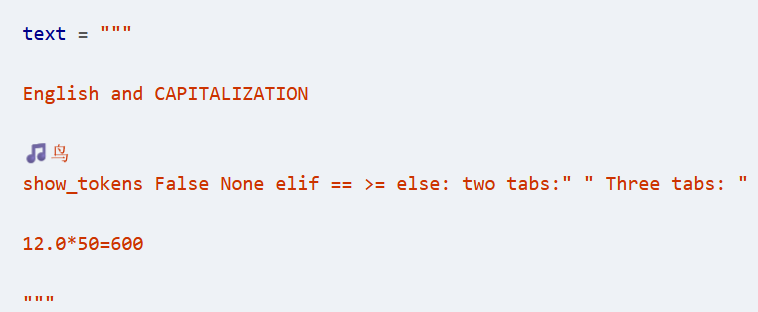